In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features = pd.read_csv("training_set_features.csv")
labels = pd.read_csv("training_set_labels.csv")

In [3]:
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [5]:
# I will join both dataframes so that further processing will be easier

df = pd.merge(features, labels, on='respondent_id')

In [6]:
# Calculate the percentage of null values for each feature
null_percentages = df.isnull().mean() * 100

# Filter features with more than 5% null values
features_with_nulls = null_percentages[null_percentages > 30]

# Print the features with more than 5% null values and their null percentages
print("Features with more than 30% null values:", '\n')
for feature, percentage in features_with_nulls.items():
    print(f"{feature}: {percentage:.2f}% null values")



Features with more than 30% null values: 

health_insurance: 45.96% null values
employment_industry: 49.91% null values
employment_occupation: 50.44% null values


health_insurance, employment_industry and employment_industry these features will need to be dropped as a very large portion of values is null

In [7]:
df = df.drop(['health_insurance', 'employment_industry', 'employment_occupation'], axis = 1)

In [8]:
# checking features with less than 30% of null values

# Calculate the percentage of null values for each feature
null_percentages = df.isnull().mean() * 100

# Filter features with more than 5% null values
features_with_nulls = null_percentages[(null_percentages <= 30) & (null_percentages > 0)]

# Sort features by descending order of missing values
features_with_nulls = features_with_nulls.sort_values(ascending=False)

# Print the features with more than 5% null values and their null percentages
print("Features with less than 30% null values:", '\n')
for feature, percentage in features_with_nulls.items():
    print(f"{feature}: {percentage:.2f}% null values")


Features with less than 30% null values: 

income_poverty: 16.56% null values
doctor_recc_seasonal: 8.09% null values
doctor_recc_h1n1: 8.09% null values
rent_or_own: 7.65% null values
employment_status: 5.48% null values
marital_status: 5.27% null values
education: 5.27% null values
chronic_med_condition: 3.64% null values
child_under_6_months: 3.07% null values
health_worker: 3.01% null values
opinion_seas_sick_from_vacc: 2.01% null values
opinion_seas_risk: 1.92% null values
opinion_seas_vacc_effective: 1.73% null values
opinion_h1n1_sick_from_vacc: 1.48% null values
opinion_h1n1_vacc_effective: 1.46% null values
opinion_h1n1_risk: 1.45% null values
household_adults: 0.93% null values
household_children: 0.93% null values
behavioral_avoidance: 0.78% null values
behavioral_touch_face: 0.48% null values
h1n1_knowledge: 0.43% null values
h1n1_concern: 0.34% null values
behavioral_large_gatherings: 0.33% null values
behavioral_outside_home: 0.31% null values
behavioral_antiviral_meds: 0

we will take a look at some of the features with significant amount of null values

In [9]:
df[['income_poverty', 'doctor_recc_seasonal', 'doctor_recc_h1n1', 'rent_or_own','education']].head()

,income_poverty,doctor_recc_seasonal,doctor_recc_h1n1,rent_or_own,education
0,Below Poverty,0.0,0.0,Own,< 12 Years
1,Below Poverty,0.0,0.0,Rent,12 Years
2,"<= $75,000, Above Poverty",NaN,NaN,Own,College Graduate
3,Below Poverty,1.0,0.0,Rent,12 Years
4,"<= $75,000, Above Poverty",0.0,0.0,Own,Some College


In [10]:
# take a further look at income_poverty
df['income_poverty'].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

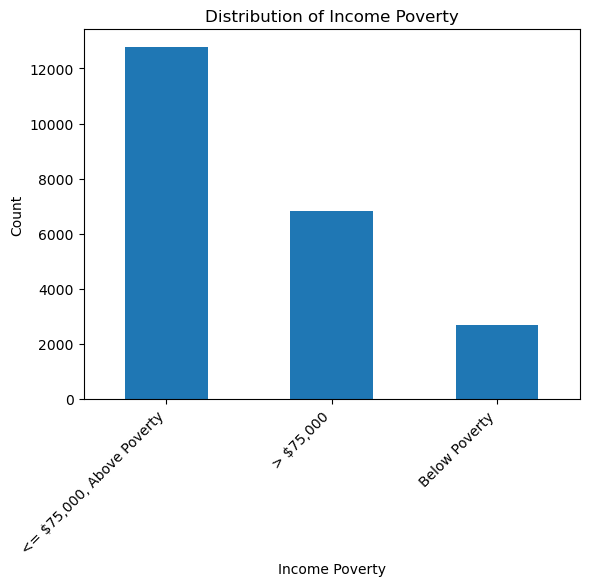

In [13]:
# plotting for furthur clarity

df['income_poverty'].value_counts().plot.bar()
plt.xlabel('Income Poverty')
plt.ylabel('Count')
# Set x-axis tick labels to be slightly curved
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Income Poverty')
plt.show()

It is safe to assume that most number of people will be above poverty
we can fill the missing values with <= $75,000, Above Poverty

In [14]:
# filling in those missing values
df['income_poverty'].fillna('<= $75,000, Above Poverty', inplace=True)

print(df['income_poverty'].value_counts(), '\n')
print("number of missing values: ")
print(df['income_poverty'].isnull().sum())

<= $75,000, Above Poverty    17200
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64 

number of missing values: 
0


Now we will take a look at doctor_recc_seasonal feature. 
It means weather seasonal flu vaccine was recommended by doctor. (binary)

In [15]:
df['doctor_recc_seasonal'].value_counts()

0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: int64

A couple of things can be done here to impute the missing values:
- We can fill it with most common value like we did before (mode)
- or else we can use a machine learning algorithm or a statistical model to predict the missing binary values based on the other available features

for the sake of simplicity I will use mode

In [16]:
# filling values with most common value

df['doctor_recc_seasonal'].fillna(df['doctor_recc_seasonal'].mode()[0], inplace=True)

print(f"the Number of Missing values are: {df['doctor_recc_seasonal'].isnull().sum()}")

the Number of Missing values are: 0


In [17]:
df['doctor_recc_seasonal'].mode()

0    0.0
dtype: float64

In [18]:
# taking a look at feature - doctor_recc_h1n1
# which means - H1N1 flu vaccine was recommended by doctor. (binary)

df['doctor_recc_h1n1'].value_counts()

0.0    19139
1.0     5408
Name: doctor_recc_h1n1, dtype: int64

In [19]:
# we will impute this feature similarly 

# filling values with most common value

df['doctor_recc_h1n1'].fillna(df['doctor_recc_h1n1'].mode()[0], inplace=True)

print(f"the Number of Missing values are: {df['doctor_recc_h1n1'].isnull().sum()}")

the Number of Missing values are: 0


We can see that other features with missing values are categorical features as well. we can impute them similarty with mode

In [20]:
for column in df.columns:
    if df[column].isnull().any():  # Check if the column has missing values
        mode_value = df[column].mode()[0]  # Calculate the mode of the column
        df[column].fillna(mode_value, inplace=True)  # Impute missing values with the mode

In [21]:
# checking for missing values again

# Calculate the percentage of null values for each feature
null_percentages = df.isnull().mean() * 100

# Filter features with more than 5% null values
features_with_nulls = null_percentages[null_percentages > 0]

# Sort features by descending order of missing values
features_with_nulls = features_with_nulls.sort_values(ascending=False)

# Print the features with more than 5% null values and their null percentages
print("Features with null values:", '\n')
for feature, percentage in features_with_nulls.items():
    print(f"{feature}: {percentage:.2f}% null values")

Features with null values: 



In [25]:
df.select_dtypes(exclude=['number']).columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object')

In [27]:
for column in df.select_dtypes(exclude=['number']).columns:
    no_unique_values = len(df[column].unique())
    print("Column:", column)
    print("No of Unique Values:", no_unique_values)
    print()

Column: age_group
No of Unique Values: 5

Column: education
No of Unique Values: 4

Column: race
No of Unique Values: 4

Column: sex
No of Unique Values: 2

Column: income_poverty
No of Unique Values: 3

Column: marital_status
No of Unique Values: 2

Column: rent_or_own
No of Unique Values: 2

Column: employment_status
No of Unique Values: 3

Column: hhs_geo_region
No of Unique Values: 10

Column: census_msa
No of Unique Values: 3



we can easily one hot encode these features as there is no column with very large amount of categorical data

In [29]:
columns_to_encode = df.select_dtypes(exclude=['number']).columns.tolist()

In [28]:
from sklearn.preprocessing import OneHotEncoder
import pickle

In [34]:
encoder = OneHotEncoder(handle_unknown='ignore')

# Subset the columns to be encoded
df_to_encode = df[columns_to_encode]

# Fit and transform the data
encoded_data = encoder.fit_transform(df_to_encode)

# Convert the transformed data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))

# Concatenate the encoded DataFrame with the original DataFrame
df_encoded = pd.concat([df, encoded_df], axis=1)

# print(df_encoded.head())

data cleaning part is done until here. We will extract the resultant dataframe from here.

In [37]:
# drop the original columns which will not be numerical
df_encoded.drop(columns_to_encode, axis= 1, inplace= True)

In [39]:
# checking for any non-numeric feature
df_encoded.select_dtypes(exclude=['number']).columns 

Index([], dtype='object')

In [40]:
df_encoded.to_csv("cleaned_train_df.csv", index= False)